In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%tensorflow_version 1.14

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [0]:
import os
import random
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.model_selection import train_test_split
from keras import layers
from keras import models
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras import Input
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
# prepare data

path = '/content/drive/My Drive/Colab Notebooks/ANN/frame_data/'
train = pd.DataFrame(columns=['file', 'label', 'keypoints'])
val = pd.DataFrame(columns=['file', 'label', 'keypoints'])

files = os.listdir(path)
random.shuffle(files)
train_files, val_files = train_test_split(files, train_size=0.8)
print(train_files)
print(val_files)

for f_train in train_files:
  df_train = pd.read_csv(os.path.join(path, f_train))
  train = train.append(df_train)
train = train.reset_index(drop=True)

for f_val in val_files:
  df_val = pd.read_csv(os.path.join(path, f_val))
  val = val.append(df_val)
val = val.reset_index(drop=True)

X_train = np.zeros((len(train), 75))
for i in range(len(train)):
  X_train[i] = np.array(literal_eval(train['keypoints'][i]))
y_train = np.array(train.label)

X_val = np.zeros((len(val), 75))
for j in range(len(val)):
  X_val[j] = np.array(literal_eval(val['keypoints'][j]))
y_val = np.array(val.label)

print("X_train: %s    y_train: %s \nX_val: %s    y_val: %s " %(X_train.shape, y_train.shape, X_val.shape, y_val.shape))


['pick14.csv', 'walk18.csv', 'pick9.csv', 'pick19.csv', 'walk9.csv', 'pick1.csv', 'wave18.csv', 'pick18.csv', 'pick32.csv', 'walk17.csv', 'pick8.csv', 'walk8.csv', 'walk12.csv', 'wave10.csv', 'pick33.csv', 'pick4.csv', 'pick13.csv', 'wave11.csv', 'pick35.csv', 'wave12.csv', 'pick25.csv', 'wave4.csv', 'wave9.csv', 'pick21.csv', 'pick11.csv', 'wave14.csv', 'pick31.csv', 'walk5.csv', 'walk10.csv', 'pick10.csv', 'pick6.csv', 'pick5.csv', 'wave13.csv', 'pick15.csv', 'pick16.csv', 'wave7.csv', 'pick26.csv', 'pick28.csv', 'wave17.csv', 'wave5.csv', 'walk15.csv', 'pick30.csv', 'walk16.csv', 'wave2.csv', 'walk4.csv', 'walk13.csv', 'pick17.csv', 'walk14.csv', 'pick2.csv', 'pick22.csv', 'walk2.csv', 'pick29.csv', 'wave3.csv', 'pick3.csv', 'pick7.csv', 'pick24.csv']
['pick20.csv', 'walk1.csv', 'wave1.csv', 'pick27.csv', 'walk6.csv', 'walk7.csv', 'walk11.csv', 'walk3.csv', 'pick12.csv', 'pick34.csv', 'wave16.csv', 'pick23.csv', 'wave6.csv', 'wave15.csv', 'wave8.csv']
X_train: (4728, 75)    y_train:





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 75, 8)             8000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 8)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               70144     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
___________________________________________

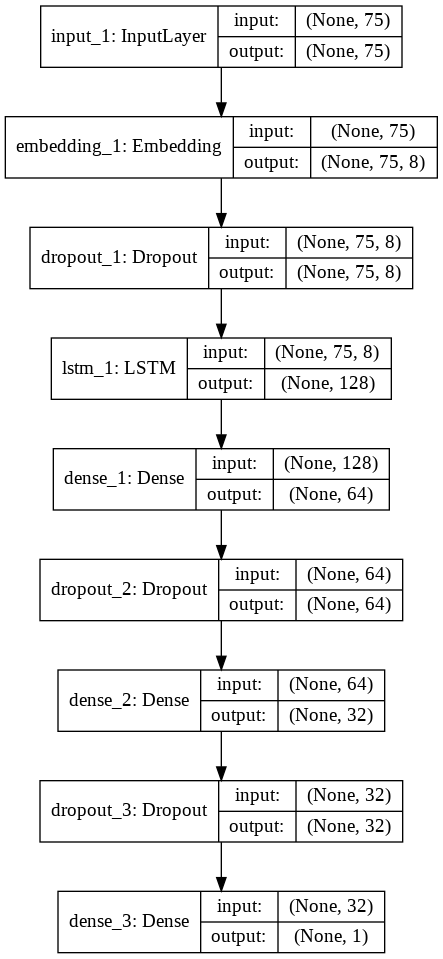

In [0]:
# build NN

inputs = Input(shape=(75,))
se1 = layers.Embedding(1000, 8, mask_zero=True)(inputs)
se2 = layers.Dropout(0.2)(se1)
se3 = layers.LSTM(128)(se2)
se4 = layers.Dense(64, activation='relu')(se3)
se5 = layers.Dropout(0.2)(se4)
se6 = layers.Dense(32, activation='relu')(se5)
se7 = layers.Dropout(0.2)(se6)
output = layers.Dense(1, activation='sigmoid')(se7)
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='mse')

model.summary()
plot_model(model, to_file='/content/drive/My Drive/Colab Notebooks/ANN/model2_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# train NN

history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))




Train on 4728 samples, validate on 1263 samples
Epoch 1/20





4728/4728 [==============================] - 8s 2ms/step - loss: 0.2295 - val_loss: 0.1801
Epoch 2/20
4728/4728 [==============================] - 6s 1ms/step - loss: 0.1620 - val_loss: 0.0714
Epoch 3/20
4728/4728 [==============================] - 6s 1ms/step - loss: 0.1220 - val_loss: 0.0702
Epoch 4/20
4728/4728 [==============================] - 6s 1ms/step - loss: 0.1156 - val_loss: 0.0489
Epoch 5/20
4728/4728 [==============================] - 6s 1ms/step - loss: 0.1132 - val_loss: 0.0565
Epoch 6/20
4728/4728 [==============================] - 6s 1ms/step - loss: 0.1056 - val_loss: 0.0721
Epoch 7/20
4728/4728 [==============================] - 6s 1ms/step - loss: 0.1050 - val_loss: 0.0754
Epoch 8/20
4728/4728 [==============================] - 6s 1ms/step - loss: 0.1016 - val_loss: 0.0728
Epoch 9/20
4728/4728 [==============================] - 6s 1ms/step - loss: 0.0987 - val_loss: 0.0661
Epoch 10/20
4728/4728 [===

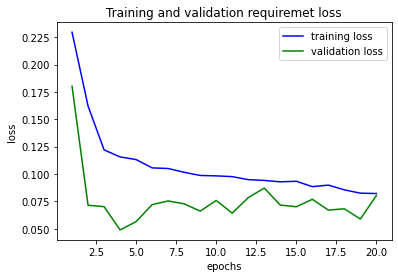

In [0]:
# Show loss

epochs = range(1,21)
plt.plot(epochs, history.history['loss'], 'b', label = 'training loss')
plt.plot(epochs, history.history['val_loss'], 'g', label = 'validation loss')
plt.title('Training and validation requiremet loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/ANN/model2-with-val.h5')

In [0]:
X = np.concatenate((X_train, X_val), axis=0)
X.shape

(5991, 75)

In [0]:
y = np.concatenate((y_train, y_val))
y.shape

(5991,)

In [0]:
# train again with all data and 20 epoch

history = model.fit(X, y, epochs=8, batch_size=128)

model.save('/content/drive/My Drive/Colab Notebooks/ANN/model2.h5')

Epoch 1/8
5991/5991 [==============================] - 8s 1ms/step - loss: 0.0763
Epoch 2/8
5991/5991 [==============================] - 7s 1ms/step - loss: 0.0733
Epoch 3/8
5991/5991 [==============================] - 7s 1ms/step - loss: 0.0709
Epoch 4/8
5991/5991 [==============================] - 7s 1ms/step - loss: 0.0708
Epoch 5/8
5991/5991 [==============================] - 8s 1ms/step - loss: 0.0696
Epoch 6/8
5991/5991 [==============================] - 7s 1ms/step - loss: 0.0705
Epoch 7/8
5991/5991 [==============================] - 8s 1ms/step - loss: 0.0653
Epoch 8/8
5991/5991 [==============================] - 8s 1ms/step - loss: 0.0653
